In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

In [5]:
def cost_function(theta0, theta1, x, y):
    m = len(x)
    predictions = hypothesis(theta0, theta1, x)
    squared_errors = (predictions - y) ** 2
    j = 1 / (2 * m) * np.sum(squared_errors)
    return j

[[ 0.5  12.75  5.75]
 [ 0.5  12.75  5.75]
 [ 0.5  12.75  5.75]]


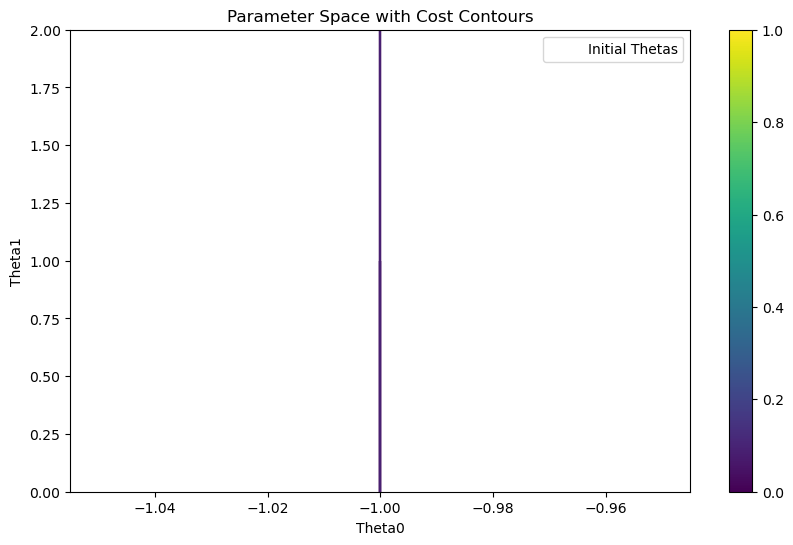

In [52]:

# x = np.arange(0,8)
# y = np.arange(0,8)
x=np.array([2,4,8])
y=np.array([0,2,3])

# theta0_values = np.linspace(-2, 2, 100)
# theta1_values = np.linspace(-2, 2, 100)
theta0_values=[-1,-1,-1]
theta1_values=[1,0,2]
theta0_mesh, theta1_mesh = np.meshgrid(theta0_values, theta1_values)


cost_values = np.zeros_like(theta0_mesh,dtype=float)
for i in range(len(theta0_values)):
    for j in range(len(theta1_values)):
        cost_values[i, j] = cost_function(theta0_values[i], theta1_values[j], x, y)
        
print(cost_values)

# Plot the contour plot of the parameter space and the cost values
plt.figure(figsize=(10, 6))
contour = plt.contour(theta0_mesh, theta1_mesh, cost_values, levels=np.logspace(-2, 2, 20))
# plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Parameter Space with Cost Contours')
plt.scatter(theta0_values, theta1_values, color='white', marker='x', label='Initial Thetas')
plt.legend()
plt.colorbar()
plt.show()


In [13]:
#Gradient Desent Algorithm 

theta0 = -1
theta1 = 1
alpha = 0.1
iterations = 999

x = np.arange(0, 100)
y = np.arange(0, 100)

# Normalize the data by --> (data - mean of the data) /standard deviation of the data
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std


theta0_history = [theta0]
theta1_history = [theta1]
cost_history = [cost_function(theta0, theta1, x_normalized, y_normalized)]


for iteration in range(iterations):
    gradient_theta0 = (1/len(x)) * np.sum(hypothesis(theta0, theta1, x_normalized) - y_normalized)
    gradient_theta1 = (1/len(x)) * np.sum((hypothesis(theta0, theta1, x_normalized) - y_normalized) * x_normalized)
    
    theta0 -= alpha * gradient_theta0
    theta1 -= alpha * gradient_theta1
    
    theta0_history.append(theta0)
    theta1_history.append(theta1)
    cost_history.append(cost_function(theta0, theta1, x_normalized, y_normalized))
    
  



print("Theta 0 =",theta0_history[-1])
print("Theta 1 =",theta1_history[-1])
print("Cost(Errors) =",cost_history[-1])




Theta 0 = -1.7333008473859564e-18
Theta 1 = 1.0
Cost(Errors) = 0.0
